In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [4]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


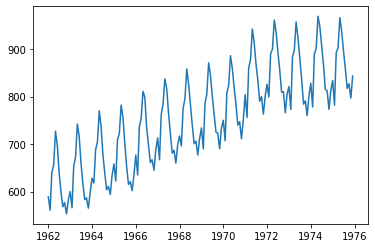

In [11]:
plt.plot(milk.index, milk['milk'])

In [13]:
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [31]:
sum(milk['milk']/milk.index.daysinmonth)

4166.326661899464

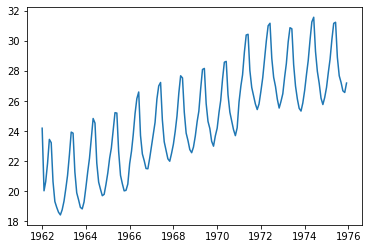

In [29]:
plt.plot(milk.index, milk_per_day)

In [35]:
milk['daily'] = milk['milk']/milk.index.daysinmonth

In [36]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


In [41]:
milk['daily_diff1'] = milk['daily'] - milk['daily'].shift(1)
milk['daily_diff12'] = milk['daily'] - milk['daily'].shift(12)

In [42]:
milk.head()

,milk,daily,daily_diff1,daily_diff12
month,,,,
1962-01-01,589,19.000000,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN
1962-03-01,640,20.645161,0.609447,NaN
1962-04-01,656,21.866667,1.221505,NaN
1962-05-01,727,23.451613,1.584946,NaN


In [48]:
sm.tsa.stattools.adfuller(milk['daily_diff1'].dropna())[1], sm.tsa.stattools.adfuller(milk['daily_diff12'].dropna())[1]

(0.06430054654174293, 0.22127672658830383)

In [52]:
milk['daily_diff121'] = milk['daily_diff12'] - milk['daily_diff12'].shift(1)

In [53]:
sm.tsa.stattools.adfuller(milk['daily_diff121'].dropna())[1]

2.2808455518036712e-06

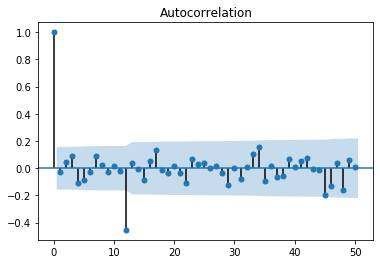

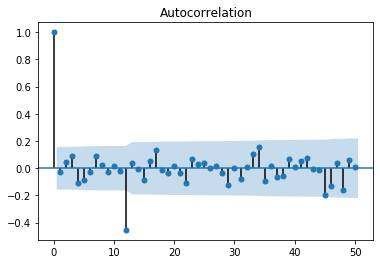

In [55]:
sm.graphics.tsa.plot_acf(milk['daily_diff121'].dropna().values.squeeze(), lags=50)

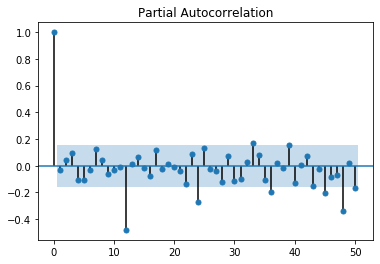

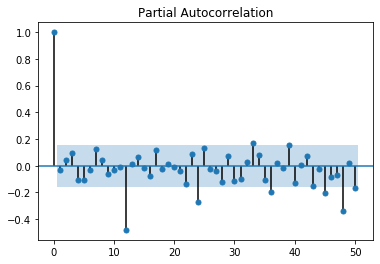

In [56]:
sm.graphics.tsa.plot_pacf(milk['daily_diff121'].dropna().values.squeeze(), lags=50)